# ML1 HW3 Parkinson's Dataset
Submitted by: LT3 | Agapito, Banquerigo, Bautista, Delfin, Estrada, Ymson

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from tqdm.notebook import tqdm, trange

In [2]:
df = pd.read_excel('parkinsons_updrs.xlsx')
df.shape

(5875, 22)

In [3]:
df.head()

,subject#,age,sex,test_time,motor_score,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Target
0,1,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [4]:
df.corr()

,subject#,age,sex,test_time,motor_score,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Target
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.135448,0.075156,0.120339,0.136474,0.120350,...,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559,0.253643
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.023071,0.035691,0.010255,0.013199,0.010258,...,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790,0.310290
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,0.051422,-0.154645,0.076718,0.087995,0.076703,...,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901,-0.096559
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,-0.022837,-0.011365,-0.028888,-0.023290,-0.028876,...,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563,0.075263
motor_score,0.252919,0.273665,-0.031205,0.067918,1.000000,0.084816,0.050903,0.072684,0.076291,0.072698,...,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433,0.947231
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,1.000000,0.865577,0.984181,0.968214,0.984184,...,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849,0.074247
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.865577,1.000000,0.844626,0.790538,0.844630,...,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853,0.066927
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.984181,0.844626,1.000000,0.947196,1.000000,...,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652,0.064015
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.968214,0.790538,0.947196,1.000000,0.947203,...,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491,0.063352
Jitter:DDP,0.120350,0.010258,0.076703,-0.028876,0.072698,0.984184,0.844630,1.000000,0.947203,1.000000,...,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660,0.064027


## Linear Regression

In [5]:
X = df.loc[:, df.columns!='Target']
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25, random_state=1) 
lr = LinearRegression().fit(X_train, y_train)

print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.909116
test set score: 0.911763


In [6]:
training_accuracy = []
test_accuracy = []
    
for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    lr = LinearRegression().fit(X_train, y_train)

    training_accuracy.append(lr.score(X_train, y_train))
    test_accuracy.append(lr.score(X_test, y_test))

print("TRAIN SET: Mean = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean =  0.9101045782105971  Stdev =  0.0011707791803451289
 TEST SET: Mean =  0.9089324614040406  Stdev =  0.003598316943670678


Weight of the top predictor = 15901.438302
Top Predictor = Jitter(Abs)


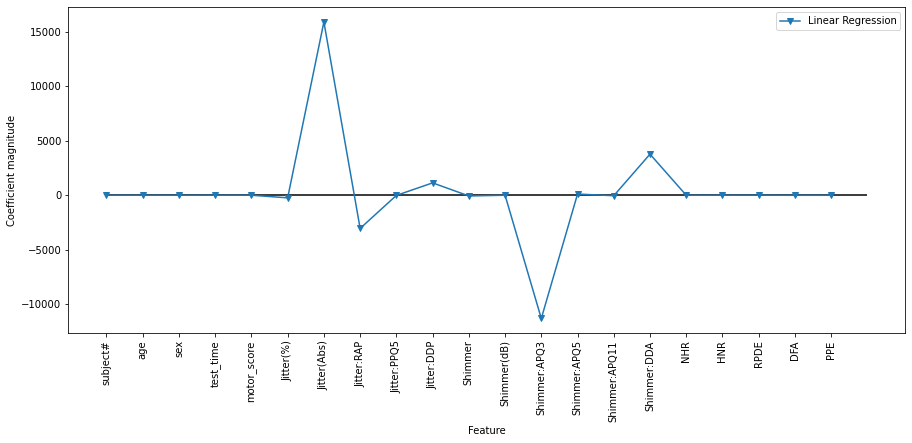

In [7]:
fig = plt.figure(figsize=(15, 6))
plt.plot(lr.coef_.T, '-v', label="Linear Regression")

plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.hlines(0,0, X.shape[1])
#plt.ylim(-20, 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

print("Weight of the top predictor = %f" %np.amax(np.abs(lr.coef_.T)))
print("Top Predictor = %s" %X.columns[np.argmax(np.abs(lr.coef_.T))])

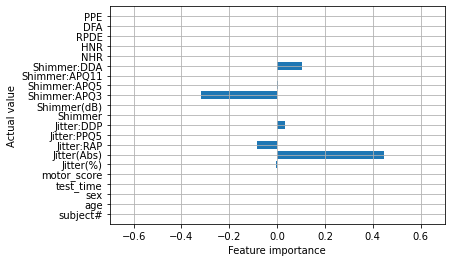

In [8]:
weights_normalized= lr.coef_.T/np.sum(np.abs(lr.coef_.T))

n_features=len(X.columns)
plt.barh(range(n_features), weights_normalized, align='center')
plt.yticks(np.arange(n_features),X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Actual value")
plt.ylim(-1,n_features)
plt.xlim(-0.7,0.7)
plt.grid(True)

## Ridge Regression

In [9]:
X = df.loc[:, df.columns!='Target']
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25, random_state=1)
ridge = Ridge(alpha=1).fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.907129
test set score: 0.911794


In [10]:
training_accuracy = []
test_accuracy = []

for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    ridge = Ridge(alpha=.4).fit(X_train, y_train)

    training_accuracy.append(ridge.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(ridge.score(X_test, y_test))   # record generalization accuracy

print("TRAIN SET: Mean = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean =  0.9085972283084828  Stdev =  0.0011751260658663918
 TEST SET: Mean =  0.9081002767582379  Stdev =  0.0035672861065373265


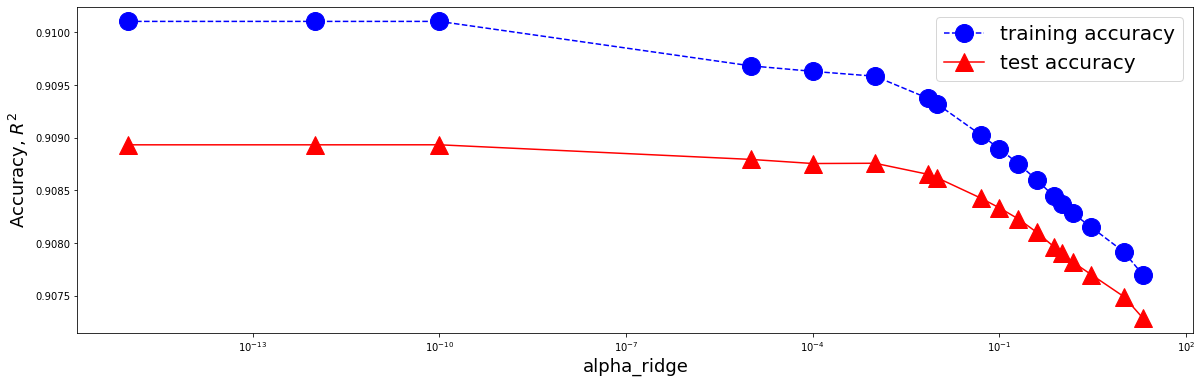

In [11]:
training_accuracy = []  
test_accuracy = []
alpha_ridge = [1e-15, 1e-12, 1e-10, 1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10, 20]

for alpha_run in alpha_ridge:
    trials_train = []
    trials_test = []

    for seedN in range(1,100,1):    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
        ridge = Ridge(alpha=alpha_run).fit(X_train, y_train)
        trials_train.append(ridge.score(X_train, y_train))
        trials_test.append(ridge.score(X_test, y_test))
    
    training_accuracy.append(np.mean(trials_train))
    test_accuracy.append(np.mean(trials_test))


fig = plt.figure(figsize=(20, 6))
plt.xscale('log')
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(alpha_ridge, training_accuracy, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(alpha_ridge, test_accuracy, label="test accuracy",color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("alpha_ridge",fontsize=18)
plt.legend()

In [12]:
trials_train = []
trials_test = []
trial_weights = []

param=1e-10
for seedN in range(1,100,1):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    ridge = Ridge(alpha=param).fit(X_train, y_train)
    trials_train.append(ridge.score(X_train, y_train))
    trials_test.append(ridge.score(X_test, y_test))
    trial_weights.append(ridge.coef_)
    
ridge1e10_weights = np.array(trial_weights).mean(axis=0)
print(f'Ave train R2: {np.array(trials_train).mean(axis=0)}')
print(f'Ave test R2: {np.array(trials_test).mean(axis=0)}')
print(f'Weights:\n{ridge1e10_weights}')

Ave train R2: 0.9101045779309772
Ave test R2: 0.9089327728828228
Weights:
[ 4.73294762e-02  7.42365745e-02 -1.74782515e+00  2.59240831e-03
  1.20705496e+00 -3.50414505e+02  1.79972961e+04  7.45131148e+03
  7.14912418e+01 -2.33223628e+03 -5.28287320e+01  7.79835021e-01
 -1.12508143e+04  1.09137078e+02 -4.38424685e+01  3.74832132e+03
 -4.11433845e+00 -8.71656247e-02  2.87075433e+00 -3.84033368e+00
 -3.92838636e+00]


Weight of the top predictor = 17997.296102
Top Predictor = Jitter(Abs)


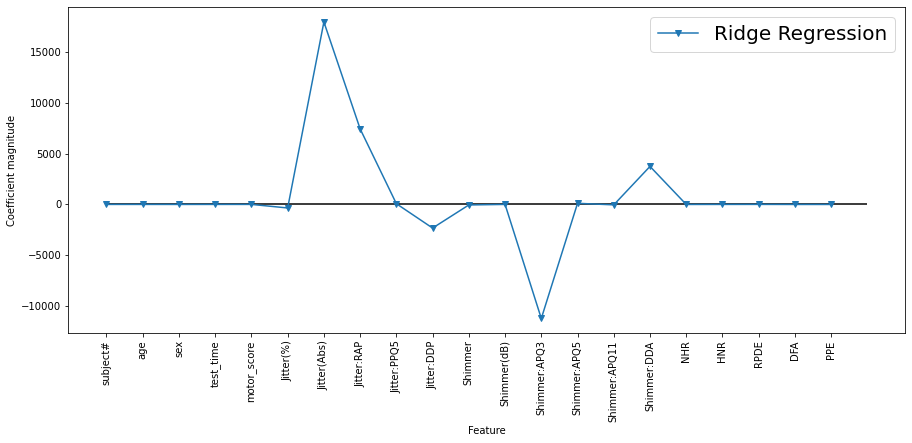

In [13]:
fig = plt.figure(figsize=(15, 6))
plt.plot(ridge1e10_weights.T, '-v', label="Ridge Regression")

plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.hlines(0,0, X.shape[1])
#plt.ylim(-20, 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

print("Weight of the top predictor = %f" %np.amax(np.abs(ridge1e10_weights.T)))
print("Top Predictor = %s" %X.columns[np.argmax(np.abs(ridge1e10_weights.T))])

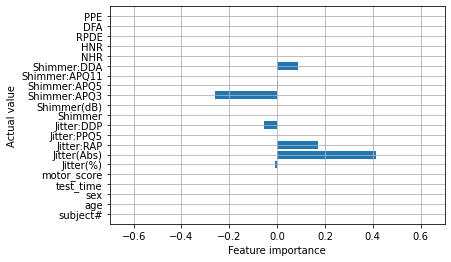

In [14]:
weights_normalized= ridge1e10_weights.T/np.sum(np.abs(ridge1e10_weights.T))

n_features=len(X.columns)
plt.barh(range(n_features), weights_normalized, align='center')
plt.yticks(np.arange(n_features),X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Actual value")
plt.ylim(-1,n_features)
plt.xlim(-0.7,0.7)
plt.grid(True)

## Lasso Regression

In [15]:
X = df.loc[:, df.columns!='Target']
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25, random_state=1)
lasso_default = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso_default.score(X_train, y_train))
print("test set score: %f" % lasso_default.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso_default.coef_ != 0))

training set score: 0.899575
test set score: 0.902401
number of features used: 4


In [16]:
lasso2 = Lasso(alpha=1, max_iter=10_000).fit(X_train, y_train)
print("training set score: %f" % lasso2.score(X_train, y_train))
print("test set score: %f" % lasso2.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso2.coef_ != 0))

training set score: 0.899575
test set score: 0.902401
number of features used: 4


  0%|          | 0/14 [00:00<?, ?it/s]

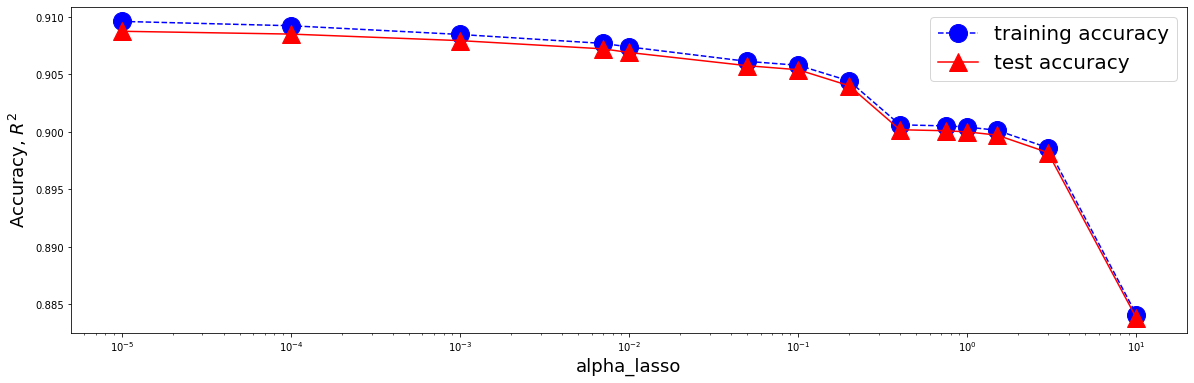

In [17]:
training_accuracy = []  
test_accuracy = []
alpha_lasso = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10]

for alpha_run in tqdm(alpha_lasso):
    trials_train = []
    trials_test = []

    for seedN in range(1,100,1):    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
        lasso = Lasso(alpha=alpha_run, max_iter=1000000).fit(X_train, y_train)
        trials_train.append(lasso.score(X_train, y_train))
        trials_test.append(lasso.score(X_test, y_test))
    
    training_accuracy.append(np.mean(trials_train))
    test_accuracy.append(np.mean(trials_test))
    

fig = plt.figure(figsize=(20, 6))
plt.xscale('log')
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(alpha_lasso, training_accuracy, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(alpha_lasso, test_accuracy, label="test accuracy",color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("alpha_lasso",fontsize=18)
plt.legend()

In [18]:
trials_train = []
trials_test = []
trial_weights = []

param=1e-5
for seedN in range(1,100,1):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    lasso = Lasso(alpha=param, max_iter=1_000_000).fit(X_train, y_train)
    trials_train.append(lasso.score(X_train, y_train))
    trials_test.append(lasso.score(X_test, y_test))
    trial_weights.append(lasso.coef_)
    
lasso1e5_weights = np.array(trial_weights).mean(axis=0)
print(f'Ave train R2: {np.array(trials_train).mean(axis=0)}')
print(f'Ave test R2: {np.array(trials_test).mean(axis=0)}')
print(f'Weights:\n{lasso1e5_weights}')

Ave train R2: 0.9096193465570193
Ave test R2: 0.9087598717611197
Weights:
[ 4.59277504e-02  7.45782395e-02 -1.93958199e+00  2.65698864e-03
  1.20416287e+00 -2.13478055e+02  0.00000000e+00  0.00000000e+00
 -3.42281658e+01  1.47144985e+02 -4.75426842e+01  6.41691476e-02
  0.00000000e+00  1.03804146e+02 -4.65900930e+01  1.23609800e+00
 -1.66391536e+00 -9.39521029e-02  3.33974161e+00 -2.95969825e+00
 -2.61226053e+00]


Weight of the top predictor = 213.478055
Top Predictor = Jitter(%)


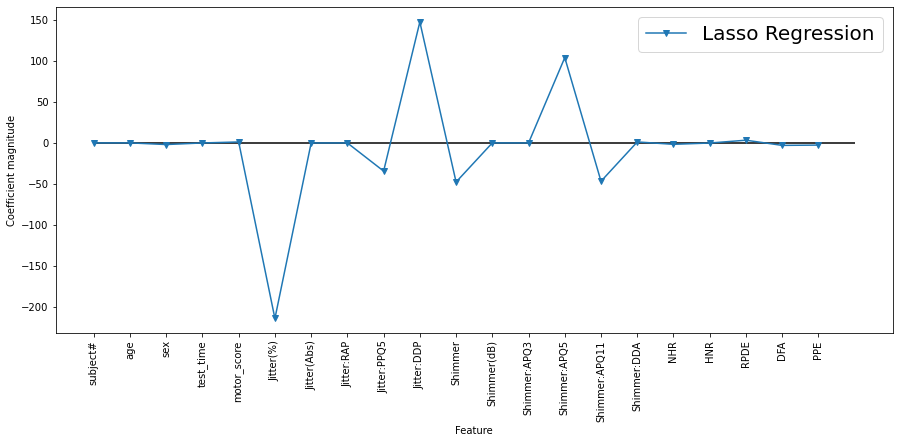

In [19]:
fig = plt.figure(figsize=(15, 6))
plt.plot(lasso1e5_weights.T, '-v', label="Lasso Regression")

plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.hlines(0,0, X.shape[1])
#plt.ylim(-20, 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

print("Weight of the top predictor = %f" %np.amax(np.abs(lasso1e5_weights.T)))
print("Top Predictor = %s" %X.columns[np.argmax(np.abs(lasso1e5_weights.T))])

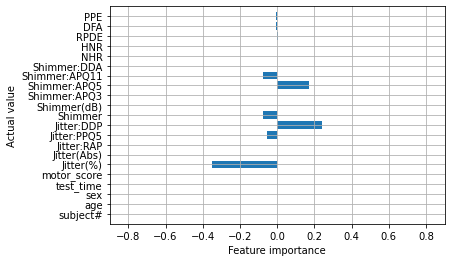

In [20]:
weights_normalized= lasso1e5_weights.T/np.sum(np.abs(lasso1e5_weights.T))

n_features=len(X.columns)
plt.barh(range(n_features), weights_normalized, align='center')
plt.yticks(np.arange(n_features),X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Actual value")
plt.ylim(-1,n_features)
plt.xlim(-0.9,0.9)
plt.grid(True)

# Comments on accuracy & optimal alpha of Lasso & Ridge Regression models for Parkinson's data

Like with the Boston data, both Ridge and Lasso Regression's best output can only be as good as that of a Linear Regression model's when we use original parameters only. Note that upon checking correlations, motor_score is close to having a perfect positive correlation with the target variable. Thus, the accuracy scores of the different regression models are likely driven by this feature. Motor_score, however, was not indicated as a top predictor for any of the models we've tried out. In a separate notebook, removing motor_score dropped the accuracy to less than 30%. 

In terms of optimal alpha: For Lasso, as alpha increases, the number of features with non-zero weights decreases. Even though lower values of alpha yield higher accuracies, choosing higher values of alpha will help with interpretability in the sense that it will limit the features to a few important ones, making it easier to explain the results to stakeholders. For example, for alpha=1, the test accuracy remains above 90% while reducing the number of important features from 21 to 4.